# Home work №2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline
import random
import numpy.random as rnd
import scikits.statsmodels as sm
import scikits.statsmodels.tools as smtools
from scipy.stats import geom
import itertools
import six

## Task 1
Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are network growing and prefferential attachment. Implement two restricted B&A-based models: <br >
Model A <br > Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

Model B <br > Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment. <br >

In [2]:
def gen_graph_A(n, m):
    G = nx.Graph()
    nodes = list(range(1,m+1))
    G.add_nodes_from(nodes)
    for i in range(m+1,n+1):
        l=list()
        l.append(i)
        G.add_nodes_from(l)
        edges=list()
        for j in range(1,i):
            edges.append([i,j])
        rand_smpl = [ edges[i] for i in sorted(random.sample(range(len(edges)), m)) ]
        G.add_edges_from(rand_smpl)
    return G

In [3]:
def gen_graph_B(n,m):
    G = nx.Graph()
    edges=list()
    nodes = list(range(n))
    G.add_nodes_from(nodes)
    rand_smpl =[ nodes[i] for i in sorted(random.sample(range(len(nodes)), m)) ]
    for i in rand_smpl:
        for j in nodes:
            if j!=i:
                p=(float(n)/10+G.degree(i)+G.degree(j))/(2*n)
                if rnd.random()<=p:
                    G.add_edge(i,j)
    return (G,rand_smpl)

## Generate networks according to the models above

In [46]:
(B,r)=gen_graph_B(1001,900)
A=gen_graph_A(1001,100)

## Compute CDF/PDF, describe the distribution and compute\describe its properties.

(array([ 225.,  168.,  134.,   95.,  115.,  133.,   57.,   37.,   30.,    7.]),
 array([ 100. ,  124.8,  149.6,  174.4,  199.2,  224. ,  248.8,  273.6,
         298.4,  323.2,  348. ]),
 <a list of 10 Patch objects>)

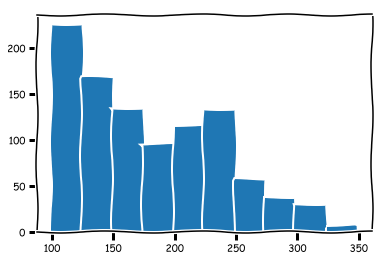

In [44]:
plt.hist(A.degree().values())

(array([  36.,   55.,   99.,  174.,  172.,  134.,  115.,  120.,   73.,   23.]),
 array([  73. ,  113.1,  153.2,  193.3,  233.4,  273.5,  313.6,  353.7,
         393.8,  433.9,  474. ]),
 <a list of 10 Patch objects>)

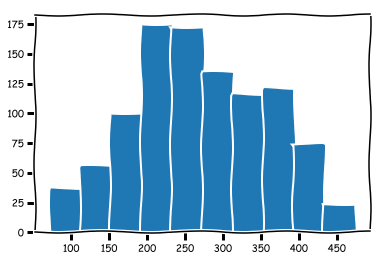

In [47]:
plt.hist(B.degree().values())

### As we can see from the histograms (pdf) it's do not even look like power law second looks like normal and on the next step of computing CDF u can see that it's very close to normal with maximum likle hoodparameters and all properties of the normal distribution. The graph_A nodes degree should have a geometric distribution in  lim case but in our example it's not so. May be just bad case. 

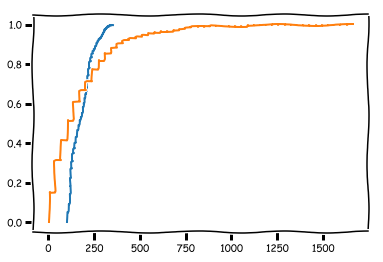

In [81]:
ecdf = smtools.tools.ECDF(A.degree().values())
x = np.linspace(min(A.degree().values()), max(A.degree().values()))
y = ecdf(x)
plt.step(x, y)
r = geom.rvs(1.0/(np.mean(A.degree().values())), size=1001)
ecdf_1 = smtools.tools.ECDF(r)
x2 = np.linspace(min(r), max(r))
y2 = ecdf_1(x2)
plt.step(x2, y2)

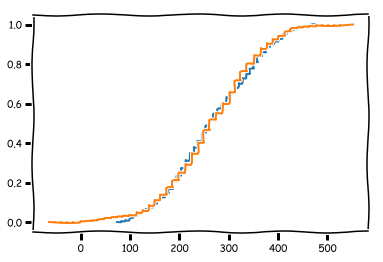

In [82]:
ecdf1 = smtools.tools.ECDF(B.degree().values())
x1 = np.linspace(min(B.degree().values()), max(B.degree().values()))
y1 = ecdf1(x1)
plt.step(x1, y1)
normal=np.random.normal(np.mean(B.degree().values()), np.sqrt(np.var(B.degree().values())), 1001)
ecdf2 = smtools.tools.ECDF(normal)
x3 = np.linspace(min(normal), max(normal))
y3 = ecdf2(x3)
plt.step(x3, y3)

### Illustate the following dependencies:
### 1.average path length to the number of nodes
### 2.average clustering coefficient to the number of nodes
### 3.average node degee to the nodes "age"

In [4]:
A_list=list()
B_list=list()
for i in np.arange(1000,5000,200):
    (B1, r1)=gen_graph_B(i, 800)
    A1=gen_graph_A(i,100)
    A_list.append(A1)
    B_list.append([B1,r1])

In [5]:
apl_A=list()
acc_A=list()
nodes_degree=list()
for i in A_list:
    apl_A.append(nx.average_shortest_path_length(i))
    acc_A.append(nx.clustering(i))
    nodes_degree.append(i.degree().values())
    

let's make choice not random for 3-rd graph to complete 3-rd task. 

In [8]:
def gen_graph_B(n,m):
    G = nx.Graph()
    edges=list()
    nodes = list(range(n))
    G.add_nodes_from(nodes)
    rand_smpl = nodes[0:m]
    for i in rand_smpl:
        for j in nodes:
            if j!=i:
                p=(float(n)/10+G.degree(i)+G.degree(j))/(2*n)
                if rnd.random()<=p:
                    G.add_edge(i,j)
    return G
B_list=list()
for i in np.arange(1000,5000,400):
    B1=gen_graph_B(i, 800)
    B_list.append(B1)

In [9]:
apl_B=list()
acc_B=list()
nodes_degree_B=list()
for i in B_list:
    apl_B.append(nx.average_shortest_path_length(i))
    acc_B.append(nx.clustering(i))
    nodes_degree_B.append(i.degree().values())

## Now let's plot the dependencies. 
### 1.average path length to the number of nodes (nonlinear incriease)

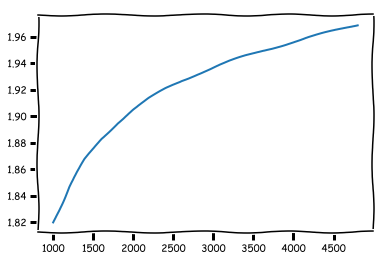

In [18]:
plt.plot(np.arange(1000,5000,200),apl_A) 

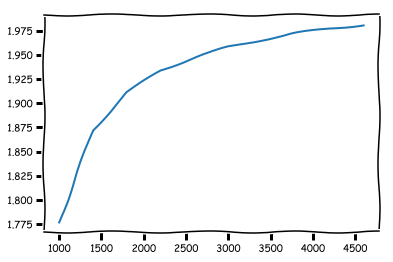

In [19]:
plt.plot(np.arange(1000,5000,400),apl_B)

### 2.average clustering coefficient to the number of nodes (nonlinear decrease)

In [20]:
ACC_A=list()
for i in range(len(acc_A)):
    ACC_A.append(np.mean(acc_A[i].values()))
ACC_B=list()
for i in range(len(acc_B)):
    ACC_B.append(np.mean(acc_B[i].values()))    

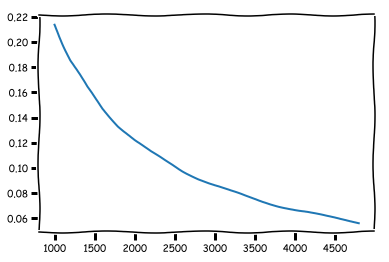

In [21]:
plt.plot(np.arange(1000,5000,200),ACC_A)

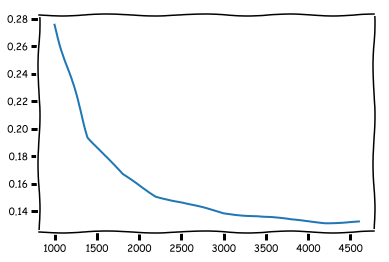

In [22]:
plt.plot(np.arange(1000,5000,400),ACC_B)

### 3.average node degee to the nodes "age" for a graph decrease with age, for b strange dependency.

In [26]:
BB=map(list, zip(*nodes_degree_B))
AA=map(list, zip(*nodes_degree))

In [27]:
nodes_aver_age_A=list()
nodes_aver_age_B=list()
for i in AA:
    nodes_aver_age_A.append(np.mean(i))
for i in BB:
    nodes_aver_age_B.append(np.mean(i))    

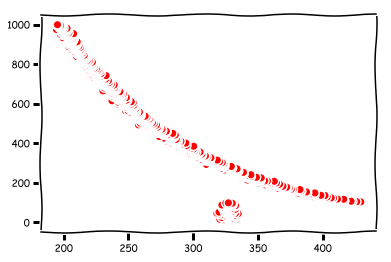

In [30]:
plt.plot(nodes_aver_age_A,range(len(nodes_aver_age_A)), "ro")

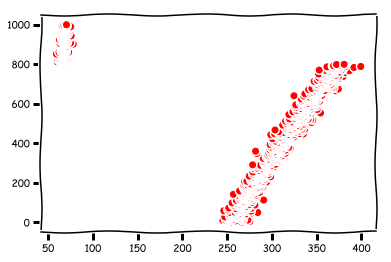

In [29]:
plt.plot(nodes_aver_age_B,range(len(nodes_aver_age_B)), "ro")

## Is scale-free property conserved in these models?
### The answer is no for the both model because both of them has degree distribution that not even look like power law.

# Part 2 Vertex copying model

In [33]:
def gen_graph_C(n,q, di="0"):
    n=n-10
    if di==1:
        G=nx.erdos_renyi_graph(10,0.5,directed=True)
        for i in range(10,10+n):
            t=random.choice(G.nodes())
            nodes_for_play=G.nodes()
            del nodes_for_play[t]
            in_edges=G.in_edges(t)
            out_edges=G.out_edges(t)
            G.add_node(i)
            for j in range(len(in_edges)):
                if rnd.random()<=q:
                    G.add_edge(in_edges[j][0],i)
                else:
                    G.add_edge(random.choice(nodes_for_play),i)
            for k in range(len(out_edges)):
                if rnd.random()<=q:
                    G.add_edge(i,out_edges[k][1])
                else:
                    G.add_edge(i,random.choice(nodes_for_play))
    if di!=1:
        G=nx.erdos_renyi_graph(10,0.5)
        for i in range(10,10+n):
            t=random.choice(G.nodes())
            nodes_for_play=G.nodes()
            del nodes_for_play[t]
            edges=G.edges(t)
            G.add_node(i)
            for j in range(len(edges)):
                if rnd.random()<=q:
                    G.add_edge(edges[j][0],i)
                else:
                    G.add_edge(random.choice(nodes_for_play),i)
    return G

Generate graphs based on the model

In [34]:
C=gen_graph_C(1001,0.3)

Compute CDF/PDF, describe the distribution and compute\describe its properties.

(array([  10.,   55.,  114.,  205.,  220.,  184.,  117.,   66.,   21.,    9.]),
 array([  9. ,  14.3,  19.6,  24.9,  30.2,  35.5,  40.8,  46.1,  51.4,
         56.7,  62. ]),
 <a list of 10 Patch objects>)

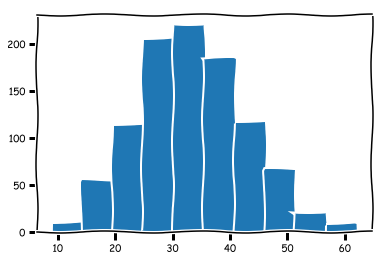

In [35]:
plt.hist(C.degree().values())

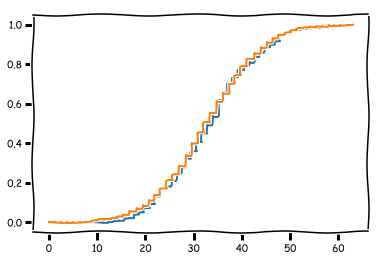

In [36]:
ecdf_C = smtools.tools.ECDF(C.degree().values())
x_c = np.linspace(min(C.degree().values()), max(C.degree().values()))
y_c = ecdf_C(x_c)
plt.step(x_c, y_c)
normal_c=np.random.normal(np.mean(C.degree().values()), np.sqrt(np.var(C.degree().values())), 1001)
ecdf_C_2 = smtools.tools.ECDF(normal_c)
x_C_2 = np.linspace(min(normal_c), max(normal_c))
y_C_2 = ecdf_C_2(x_C_2)
plt.step(x_C_2, y_C_2)

look's very close to B situation (looks like normal distr of degrees)

In [37]:
C_list=list()
for i in np.arange(1000,5000,400):
    C1=gen_graph_C(i,0.3)
    C_list.append(C1)

In [38]:
apl_C=list()
acc_C=list()
nodes_degree_C=list()
for i in C_list:
    apl_C.append(nx.average_shortest_path_length(i))
    acc_C.append(nx.clustering(i))
    nodes_degree_C.append(i.degree().values())
ACC_C=list()
for i in range(len(acc_C)):
    ACC_C.append(np.mean(acc_C[i].values()))
CC=map(list, zip(*nodes_degree_C))
nodes_aver_age_C=list()
for i in CC:
    nodes_aver_age_C.append(np.mean(i))

### 1.average path length to the number of nodes (nonlinear incriease)

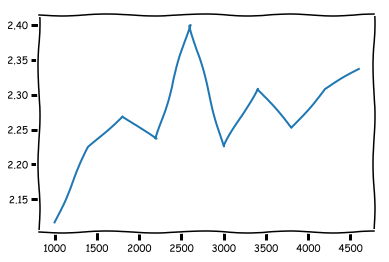

In [39]:
plt.plot(np.arange(1000,5000,400),apl_C)

### 2.average clustering coefficient to the number of nodes (nonlinear decrease)

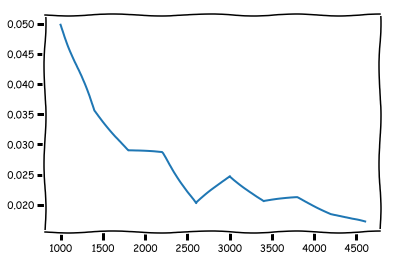

In [40]:
plt.plot(np.arange(1000,5000,400),ACC_C)

### 3.average node degee to the nodes "age" for c graph decrease with age.

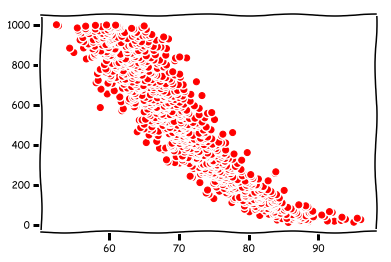

In [41]:
plt.plot(nodes_aver_age_C[11:],range(len(nodes_aver_age_C))[11:], "ro")

To sum up it is not also scale free. 

(array([ 635.,  241.,   83.,   17.,   12.,    5.,    0.,    5.,    2.,    1.]),
 array([  1. ,   2.7,   4.4,   6.1,   7.8,   9.5,  11.2,  12.9,  14.6,
         16.3,  18. ]),
 <a list of 10 Patch objects>)

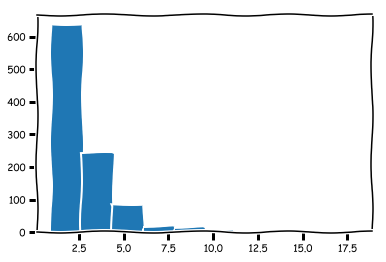

In [44]:
C2=gen_graph_C(1001,0.9)
plt.hist(C2.degree().values())

(array([   9.,   29.,   71.,  125.,  212.,  218.,  197.,   86.,   43.,   11.]),
 array([  75. ,   84.5,   94. ,  103.5,  113. ,  122.5,  132. ,  141.5,
         151. ,  160.5,  170. ]),
 <a list of 10 Patch objects>)

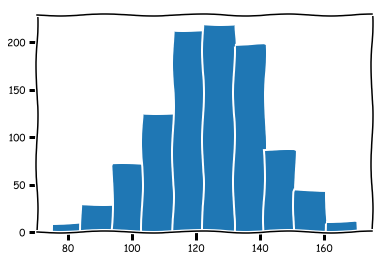

In [43]:
C3=gen_graph_C(1001,0.1)
plt.hist(C3.degree().values())

for large q EPDF is looks like power law, but may be it will look's like graph A with increase of n. For small q it's close to normal still (does not even close EPDF to power law) 